In [66]:
!pip install graphviz
!pip install pydotplus
!pip install six

In [90]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
import pydotplus, graphviz
from IPython.display import Image 
from six import StringIO
import matplotlib.pyplot as plt

In [91]:
import inspect
import warnings
warnings.filterwarnings("ignore") 

In [92]:
def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [93]:
def plot_decision_tree(clf, feature_name, target_name, tree_name):
    dot_data = tree.export_graphviz(clf, 
                  feature_names=feature_name,  
                  class_names=target_name,  
                  filled=True, rounded=True,  
                  special_characters=True,
                    out_file=None
                        )
    
    graph = graphviz.Source(dot_data)
    graph.format = "png"
    graph.render(tree_name)
    return graph

In [94]:
def print_metrics(y_pred, y_true, name, with_print=False):
    y_pred, y_true = converted_labels(pd.Series(y_pred), pd.Series(y_true))
    y_pred = y_pred.values.astype(int)
    y_true = y_true.values.astype(int)
    
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    F1_score = metrics.f1_score(y_true, y_pred)
    BA = metrics.balanced_accuracy_score(y_true, y_pred)
    MCC = metrics.matthews_corrcoef(y_true, y_pred)
    
    lst = [(retrieve_name(accuracy)[0], accuracy), 
           (retrieve_name(precision)[0], precision),
           (retrieve_name(recall)[0], recall),
           (retrieve_name(F1_score)[0], F1_score),
           (retrieve_name(BA)[0], BA),
           (retrieve_name(MCC)[0], MCC)]
    
    if with_print:
        print(f'Metrics for {name}:')
        for el in lst:
            print(f'\t{el[0]}: {el[1]}')
    
    return lst

In [95]:
def converted_labels(pred, labels):
    global Y_true_labels
    values = Y_true_labels.copy()
    def convert(series, values):
        series[series==values[0]] = 1
        series[series==values[1]] = 0
        return series
    
    return convert(pred, values), convert(labels, values)

In [96]:
def plot_metrics(set1, set2, labels, title):
    metrics = [el[0] for el in set1]
    values_list1 = [el[1] for el in set1]
    values_list2 = [el[1] for el in set2]

    bar_width = 0.35

    index = np.arange(len(metrics))

    subplots = 1
    fig, axs = plt.subplots(subplots, 1, figsize=(12, 8))

#     for i in range(subplots):
    axs.bar(index - bar_width/2, values_list1, bar_width, label=labels[0], color='#ffa781')
    axs.bar(index + bar_width/2, values_list2, bar_width, label=labels[1], color='#5b0e2d')

    axs.set_ylabel('Values')
    axs.set_title(title)
    axs.set_xticks(index)
    axs.set_xticklabels(metrics, rotation=45)
    axs.set_yticks(np.linspace(0, 1, 11))
    axs.legend()

    plt.tight_layout()
    plt.show()

In [97]:
RAND = 111

### 1. Відкрити та зчитати наданий файл з даними.

In [98]:
df = pd.read_csv('dataset3.csv', header=None)

In [99]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [100]:
Y_true_labels = df.iloc[:, -1].unique().tolist()
print(f'Список True позначок класів: {Y_true_labels}')

Список True позначок класів: ['g', 'h']


### 2. Визначити та вивести кількість записів та кількість полів у завантаженому наборі даних.

In [101]:
print(f'Кількість записів: {len(df)}')
print(f'Кількість полів: {len(df.columns)}')

Кількість записів: 19020
Кількість полів: 11


### 3. Вивести перші 10 записів набору даних.

In [102]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


### 4. Розділити набір даних на навчальну (тренувальну) та тестову вибірки, попередньо перемішавши початковий набір даних.

pandas.DataFrame.sample обирає випадковим (рандомним) чином частку з оригінального датасету, вказану в аргументі frac: якщо frac = 1, то ми рандомно обираємо 1 * 100% = 100% рядків з оригінального датасету

In [103]:
df = df.sample(frac=1)
df

,0,1,2,3,4,5,6,7,8,9,10
651,25.1526,0.0000,2.1599,0.7405,0.4671,24.1870,18.1689,0.0000,61.2160,237.147,g
6973,24.0598,15.2870,2.4807,0.5719,0.3884,6.0305,25.2754,-7.8155,15.4535,222.331,g
6657,41.3532,19.7374,2.7466,0.3692,0.2106,-45.4706,-11.5435,-17.3627,4.0900,296.447,g
10756,30.9901,12.6604,2.6469,0.3788,0.1928,27.3772,-14.2005,-8.5442,28.9190,169.901,g
1848,44.7025,17.2750,2.8820,0.3005,0.1568,39.1008,31.9774,15.3809,14.5058,177.162,g
...,...,...,...,...,...,...,...,...,...,...,...
15728,133.1550,29.9931,3.3998,0.2370,0.1273,-24.3823,-87.6751,-17.5434,14.1340,302.857,h
259,19.4731,12.2939,2.4556,0.5219,0.3205,-1.0000,9.8855,-10.4173,53.7383,202.139,g
2012,46.2076,23.1547,3.5464,0.2265,0.1306,13.6893,28.5121,-10.8417,1.5160,180.670,g
2652,43.1955,18.2841,2.8899,0.2616,0.1347,-24.5406,37.1483,15.1093,0.0750,162.797,g


Розділимо набір даних на навчальну (тренувальну) та тестову вибірки:
- The usual [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle) style practical answer: use 80 percent of the data for training, and test on the rest.
- The Pareto principle (also known as the 80/20 rule, the law of the vital few and the principle of factor sparsity) states that for many outcomes, roughly 80% of consequences come from 20% of causes (the "vital few").

In [104]:
eighty = int(len(df) * 0.8) 

train = df.iloc[:eighty]
test = df.iloc[eighty:]

In [105]:
print(f'Кількість рядків у тренувальній вибірці: {len(train)}')
print(f'Кількість рядків у тестовій вибірці: {len(test)}', end='\n\n')

print(f'Разом - {len(train) + len(test)}, кількість рядків оригінального датасету - {len(df)}')

Кількість рядків у тренувальній вибірці: 15216
Кількість рядків у тестовій вибірці: 3804

Разом - 19020, кількість рядків оригінального датасету - 19020


### 5. Використовуючи відповідні функції **scikit-learn**:
- збудувати класифікаційну модель дерева прийняття рішень глибини 5 

- навчити її на тренувальній вибірці, вважаючи, що в наданому наборі даних цільова характеристика визначається останнім стовпчиком, а всі інші виступають в ролі вихідних аргументів.

Розділимо тренувальну вибірку на складові Х (фічі, features) та Y (значення класів, true labels):

In [106]:
X_train = pd.DataFrame(train.iloc[:, :-1])
Y_train = pd.Series(train.iloc[:, -1])

Створимо модель дерева прийняття рішень із максимальною глибиною 5:

In [107]:
dt_entropy = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=RAND)
dt_entropy = dt_entropy.fit(X_train, Y_train)
dt_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=111)

### 6. Представити графічно побудоване дерево за допомогою бібліотеки **graphviz**.

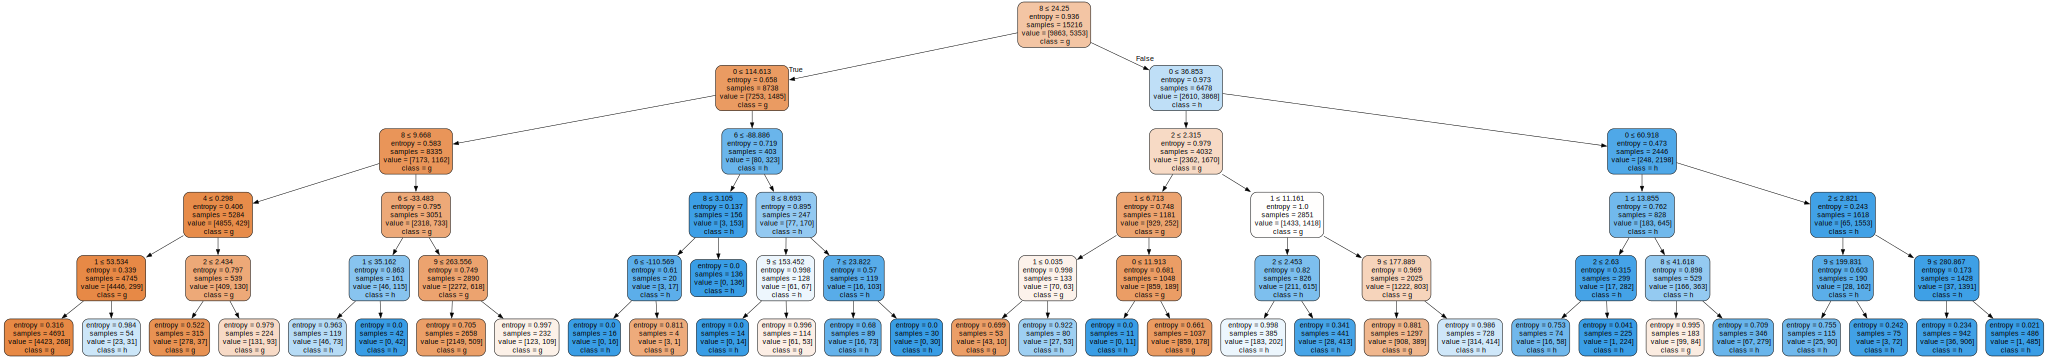

In [108]:
plot_decision_tree(dt_entropy, X_train.columns, Y_true_labels, 'DecisionTree (entropy)')

In [109]:
pd.Series(dt_entropy.predict(X_train)).value_counts()

g    10808
h     4408
dtype: int64

In [110]:
pd.Series(Y_train).value_counts()

g    9863
h    5353
Name: 10, dtype: int64

### 7. 
- обчислити класифікаційні метрики збудованої моделі для тренувальної та тестової вибірки
- представити результати роботи моделі на вибірці графічно
- порівняти результати, отримані при застосуванні різних критеріїв розщеплення: 
    - інформаційний приріст на основі ентропії
    - неоднорідність Джині


In [111]:
train_entropy = print_metrics(dt_entropy.predict(X_train), Y_train.copy(), 'DecisionTree on training set (entropy)', with_print=True)

Metrics for DecisionTree on training set (entropy):
	accuracy: 0.8345820189274448
	precision: 0.8398408586232421
	recall: 0.9203082226503092
	F1_score: 0.8782352087465533
	BA: 0.7984690748969835
	MCC: 0.628404103714408


In [112]:
X_test = pd.DataFrame(test.iloc[:, :-1])
Y_test = pd.Series(test.iloc[:, -1])

In [113]:
test_entropy = print_metrics(dt_entropy.predict(X_test), Y_test.copy(), 'DecisionTree on test set (entropy)', with_print=True)

Metrics for DecisionTree on test set (entropy):
	accuracy: 0.8188748685594112
	precision: 0.8248175182481752
	recall: 0.9153503442689348
	F1_score: 0.8677289306968707
	BA: 0.777899891235591
	MCC: 0.5909809133547639


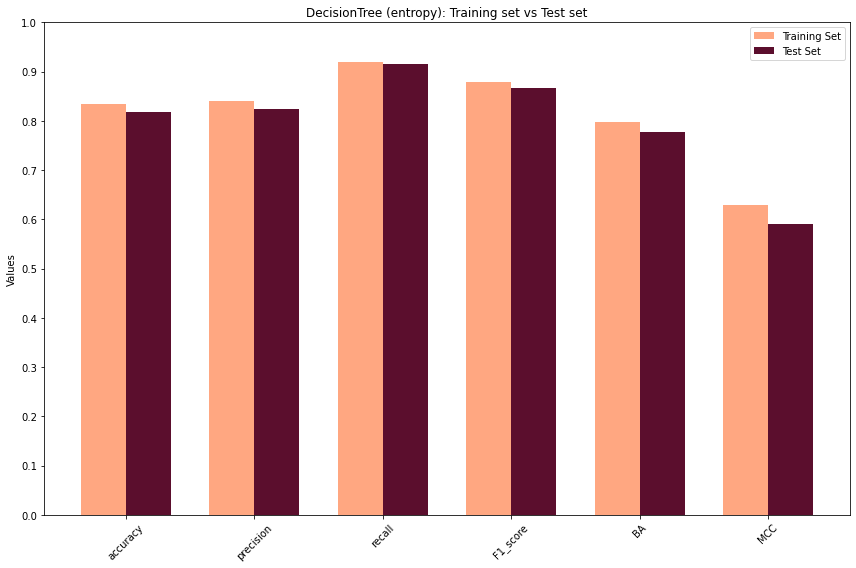

In [114]:
plot_metrics(train_entropy, test_entropy, labels=['Training Set', 'Test Set'], title='DecisionTree (entropy): Training set vs Test set')

In [115]:
dt_gini = tree.DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=RAND)
dt_gini = dt_gini.fit(X_train, Y_train)
dt_gini

DecisionTreeClassifier(max_depth=5, random_state=111)

In [116]:
train_gini = print_metrics(dt_gini.predict(X_train), Y_train.copy(), 'DecisionTree on training set (gini)', with_print=True)

Metrics for DecisionTree on training set (gini):
	accuracy: 0.8406940063091483
	precision: 0.8415832491505189
	recall: 0.929129068234817
	F1_score: 0.8831919814957594
	BA: 0.8034399310910681
	MCC: 0.6424190613210565


In [117]:
test_gini = print_metrics(dt_gini.predict(X_test), Y_test.copy(), 'DecisionTree on test set (gini)', with_print=True)

Metrics for DecisionTree on test set (gini):
	accuracy: 0.8186119873817035
	precision: 0.8210032479249368
	recall: 0.9214256784123127
	F1_score: 0.868320610687023
	BA: 0.7749450489439841
	MCC: 0.59007695425556


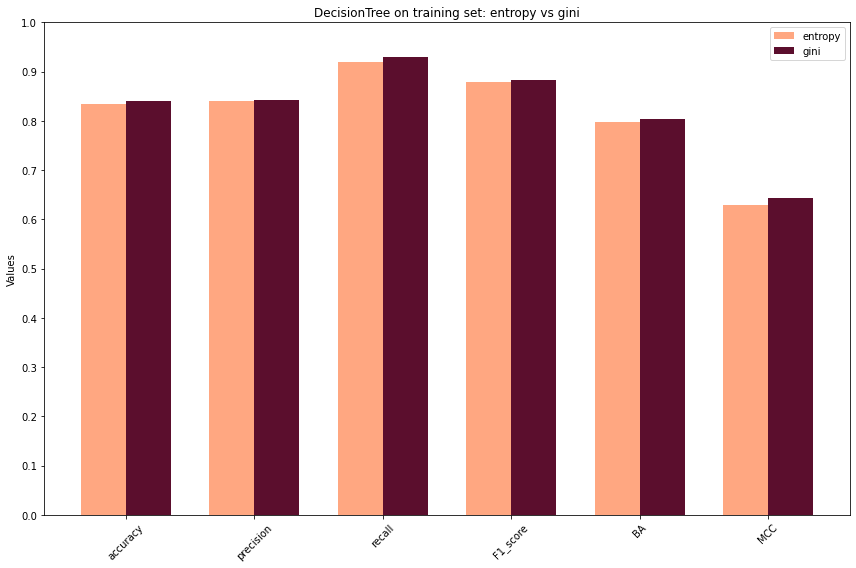

In [118]:
plot_metrics(train_entropy, train_gini, labels=['entropy', 'gini'], title='DecisionTree on training set: entropy vs gini')

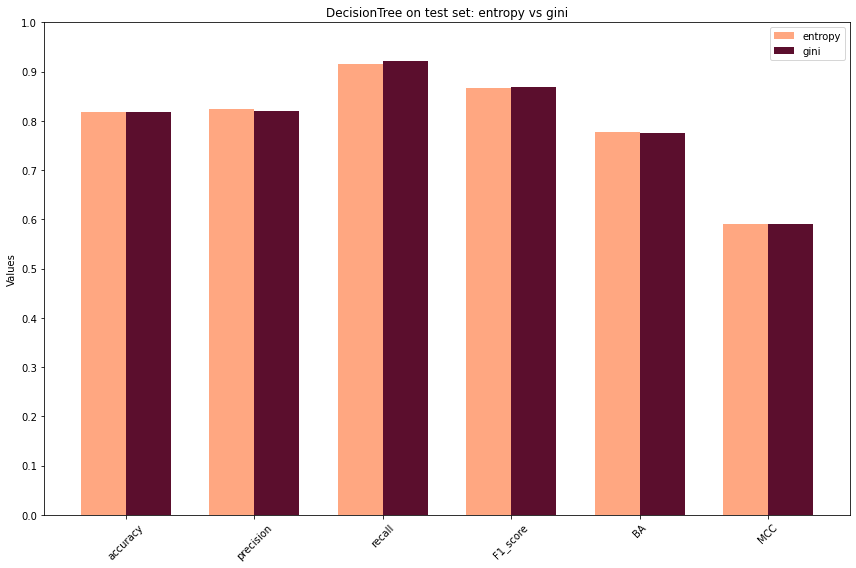

In [119]:
plot_metrics(test_entropy, test_gini, labels=['entropy', 'gini'], title='DecisionTree on test set: entropy vs gini')

### 8. З'ясувати вплив максимальної кількості листів та мінімальної кількості елементів у внутрішньому вузлі для його подальшого розбиття на результати класифікації.
- **результати представити графічно**

In [120]:
Xs = df.iloc[:, :-1]
Ys = df.iloc[:, -1]

In [121]:
def max_leaf_nodes(criterion, n):    
    grouped_metrics = dict()
    
    for i in range(2, 2*n+1):
        some_tree = tree.DecisionTreeClassifier(criterion=criterion, max_leaf_nodes=i, random_state=RAND)
        some_tree = some_tree.fit(X_train, Y_train)
        
        metrics = print_metrics(some_tree.predict(Xs), Ys.copy(), '')
        
        for j in range(len(metrics)):
            grouped_metrics.update({metrics[j][0]: grouped_metrics.get(metrics[j][0], []) + [metrics[j][1]]})
        
    return grouped_metrics

In [122]:
def min_samples_leaf(criterion, n):    
    grouped_metrics = dict()

    for i in range(2, 2*n+1):
        some_tree = tree.DecisionTreeClassifier(criterion=criterion, min_samples_leaf=i, random_state=RAND)
        some_tree = some_tree.fit(X_train, Y_train)
        
        metrics = print_metrics(some_tree.predict(Xs), Ys.copy(), '')
        
        for j in range(len(metrics)):
            grouped_metrics.update({metrics[j][0]: grouped_metrics.get(metrics[j][0], []) + [metrics[j][1]]})
        
    return grouped_metrics

In [126]:
def plot_changes(tree, no_of_nodes, name, title):
    plt.figure(figsize=(12,10))
    for k,v in tree.items():
        plt.plot(np.arange(2, 2*no_of_nodes+1), v, label=k)
    plt.xlabel(name)
    plt.ylabel('Значення метрики')
    plt.title(title)
    plt.legend()
    plt.show()

In [127]:
entropy_1 = max_leaf_nodes('entropy', dt_entropy.tree_.node_count)

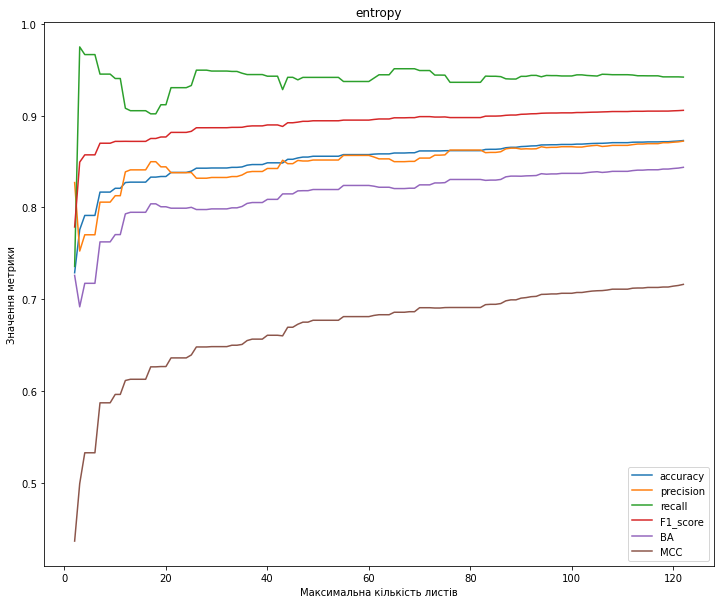

In [128]:
plot_changes(entropy_1, dt_entropy.tree_.node_count, 'Максимальна кількість листів', title='entropy')

In [129]:
# gini_1 = max_leaf_nodes('gini', dt_gini.tree_.node_count)
# plot_changes(gini_1, dt_gini.tree_.node_count, 'Максимальна кількість листів', title='gini')

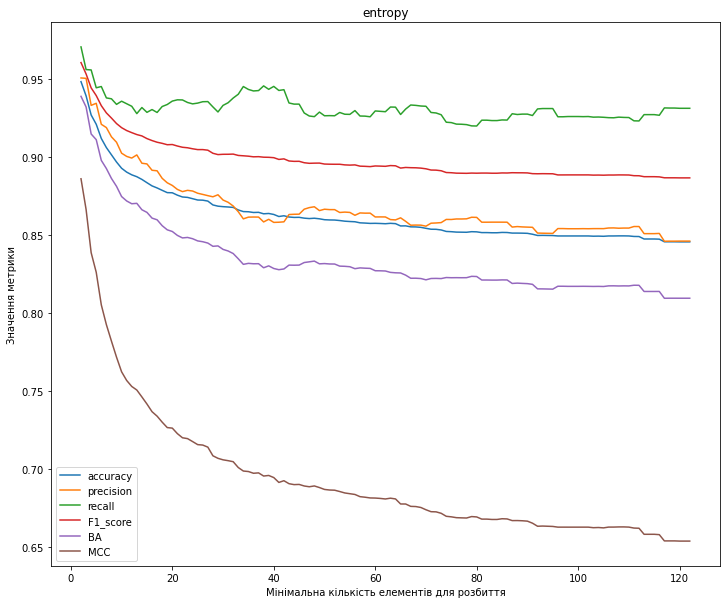

In [130]:
entropy_2 = min_samples_leaf('entropy', dt_entropy.tree_.node_count)
plot_changes(entropy_2, dt_entropy.tree_.node_count, 'Мінімальна кількість елементів для розбиття', title='entropy')

In [131]:
# gini_2 = max_leaf_nodes('gini', dt_gini.tree_.node_count)
# plot_changes(gini_2, dt_gini.tree_.node_count, 'Максимальна кількість листів', title='gini')

### 9.
- навести стовпчикову діаграму важливості атрибутів, які використовувалися для класифікації (див. **feature_importances_**)
- пояснити, яким чином — на Вашу думку — цю важливість можна підрахувати

In [88]:
feature_importance = list(zip(X_train.columns, dt_gini.feature_importances_))

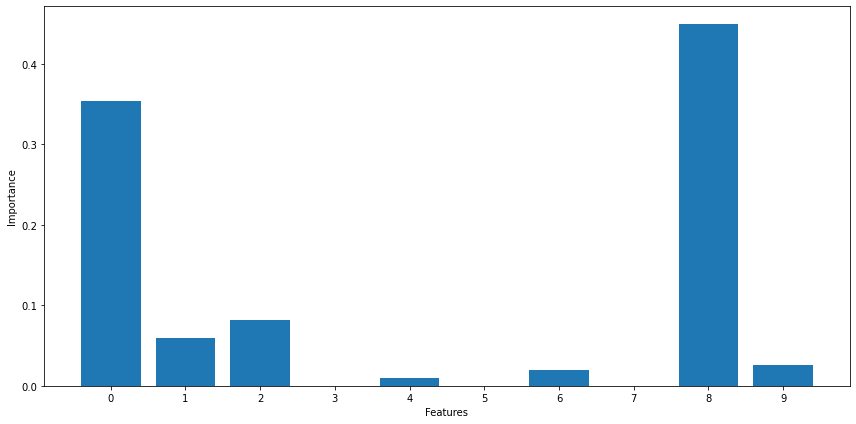

In [89]:
xs = [el[0] for el in feature_importance]
ys = [el[1] for el in feature_importance]

plt.figure(figsize=(12, 6))
plt.xticks(np.arange(len(xs)))
plt.bar(xs, ys)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Властивість feature_importance_ у DeicisionTreeClassifier'a є нічим іншим, як Gini importance (що підтверджується в описі властивості в документації). Важливість кожного атрибуту представляє собою кількість разів, що атрибув використовувався у вузлах для подальшого розщеплення дерева, зважену кількістю об'єктів, що була розщеплена на кожному конкретному вузлі. 